In [45]:
# import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

In [46]:
# load encoded data for modelling
model_path = "DataCoSupplyChainDataset_cleaned.csv"
df_model = pd.read_csv(model_path)

print(df_model.shape)
df_model.head()

(180519, 12)


,Late_delivery_risk,Delivery Status,Days for shipping (real),Days for shipment (scheduled),Shipping Mode,Order Region,Order Country,Order Item Quantity,Sales,Order Item Total,order_to_ship_days,shipping_delay_days
0,0,Advance shipping,3,4,Standard Class,Southeast Asia,Indonesia,1,327.75,314.640015,3,-1
1,1,Late delivery,5,4,Standard Class,South Asia,India,1,327.75,311.359985,5,1
2,0,Shipping on time,4,4,Standard Class,South Asia,India,1,327.75,309.720001,4,0
3,0,Advance shipping,3,4,Standard Class,Oceania,Australia,1,327.75,304.809998,3,-1
4,0,Advance shipping,2,4,Standard Class,Oceania,Australia,1,327.75,298.250000,2,-2


In [47]:
# One-hot encode categorical variables
cat_cols = ["Shipping Mode"]

df_model = pd.get_dummies(
    df_model,
    columns=cat_cols,
    drop_first=True
)

In [48]:
# Split features and target variable

#Target variable
y = df_model["Late_delivery_risk"]

#Features
x = df_model.drop(columns=["Late_delivery_risk", "Delivery Status", "Order Country", "Order Region"])

x.shape, y.shape

((180519, 10), (180519,))

In [49]:
#split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

X_train.shape, X_test.shape

((144415, 10), (36104, 10))

In [50]:
# Standardize numerical features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
#train logistic regression model
log_reg = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

log_reg.fit(X_train_scaled, y_train)

c:\Users\AIH005\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [52]:
# Make predictions and evaluate the model
y_pred = log_reg.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}\n")

print("Classification report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.974

Classification report:

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     16308
           1       0.96      1.00      0.98     19796

    accuracy                           0.97     36104
   macro avg       0.98      0.97      0.97     36104
weighted avg       0.98      0.97      0.97     36104



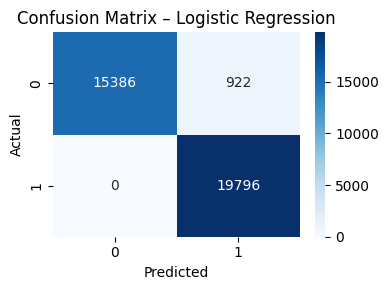

In [53]:
# Plot confusion matrix - shows the performance of the classification model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression")
plt.tight_layout()
plt.show()

In [54]:
# Feature importance
coefs = pd.DataFrame({
    "feature": x.columns,
    "coefficient": log_reg.coef_[0]
})

coefs_sorted = coefs.sort_values("coefficient", ascending=False)
coefs_sorted.head(10)

,feature,coefficient
6,shipping_delay_days,6.599679
0,Days for shipping (real),6.092072
3,Sales,0.092859
1,Days for shipment (scheduled),0.026587
9,Shipping Mode_Standard Class,-0.004283
2,Order Item Quantity,-0.009560
4,Order Item Total,-0.092480
8,Shipping Mode_Second Class,-0.505092
7,Shipping Mode_Same Day,-1.077824
5,order_to_ship_days,-7.097100


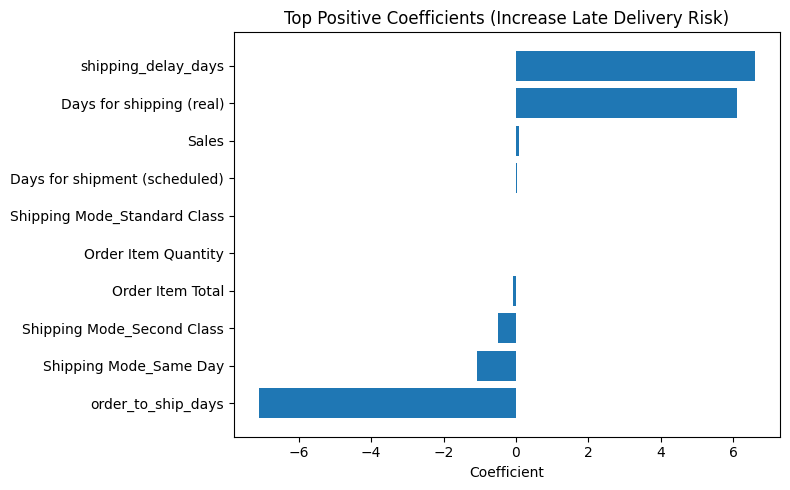

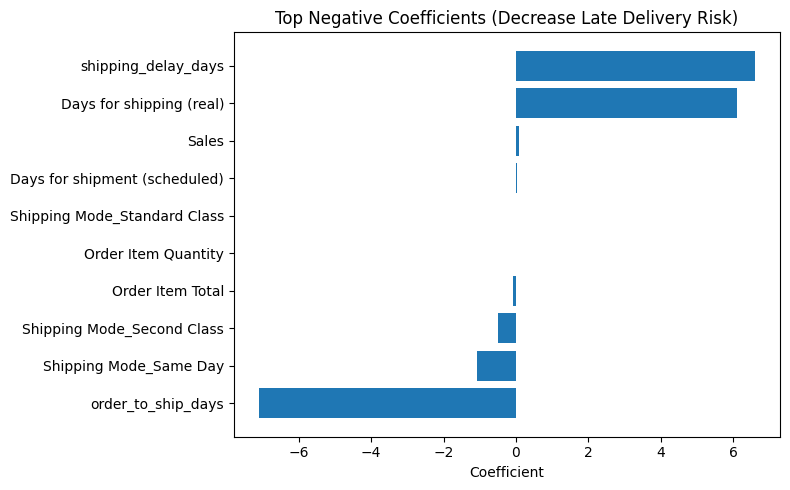

In [55]:
top_pos = coefs_sorted.head(10)
top_neg = coefs_sorted.tail(10)

plt.figure(figsize=(8,5))
plt.barh(top_pos["feature"], top_pos["coefficient"])
plt.title("Top Positive Coefficients (Increase Late Delivery Risk)")
plt.xlabel("Coefficient")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.barh(top_neg["feature"], top_neg["coefficient"])
plt.title("Top Negative Coefficients (Decrease Late Delivery Risk)")
plt.xlabel("Coefficient")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()